In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="ticks")

In [2]:
#Assign it to a variable called online_rt
path ='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'
online_rt = pd.read_csv(path, encoding = 'latin1')
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


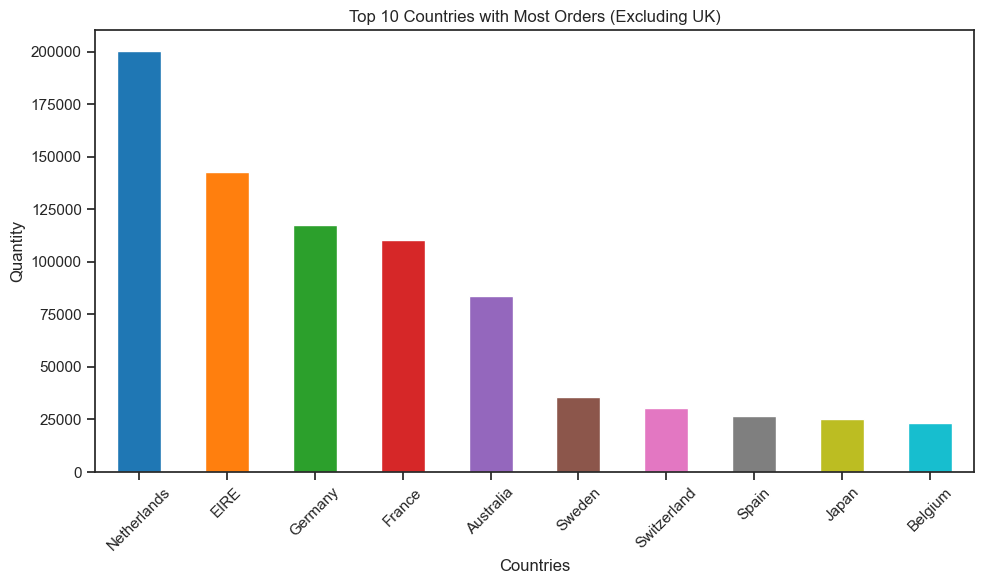

In [8]:
# Step 1: Import necessary library
import matplotlib.pyplot as plt

# Step 2: Group by country and sum numerical fields
countries = online_rt.groupby("Country").sum(numeric_only=True)

# Step 3: Sort countries by Quantity
sorted_countries = countries.sort_values(by="Quantity", ascending=False)



# Step 5: Extract top 10 countries excluding UK (assuming UK is at index 0)
top_countries = sorted_countries[1:11]  # Skip UK

# Step 6: Plot top 10 countries (excluding UK)
colors = plt.cm.tab10.colors  # 10 distinct colors
plt.figure(figsize=(10, 6))
top_countries["Quantity"].plot(kind="bar", color=colors)
plt.xlabel("Countries")
plt.ylabel("Quantity")
plt.title("Top 10 Countries with Most Orders (Excluding UK)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
#Exclude negative Quantity entries
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


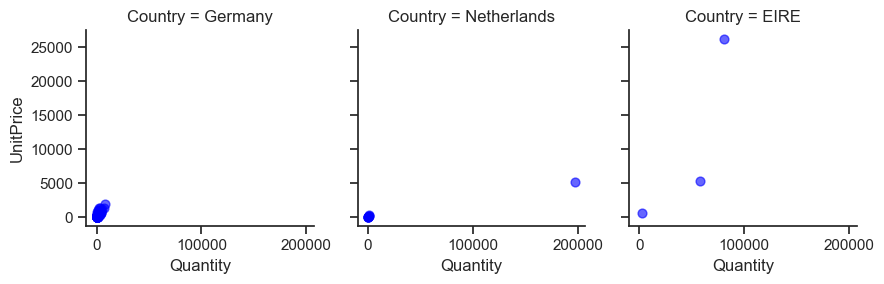

In [13]:
# Step 1: Group by CustomerID and Country, and sum numerical values
customers = online_rt.groupby(['CustomerID', 'Country']).sum(numeric_only=True)

# Step 2: Remove entries with non-positive UnitPrice
customers = customers[customers.UnitPrice > 0]

# Step 3: Extract 'Country' from multi-index to a column
customers['Country'] = customers.index.get_level_values(1)

# Step 4: Define top 3 countries (excluding UK)
top_countries = ['Netherlands', 'EIRE', 'Germany']

# Step 5: Filter data to include only top countries
customers = customers[customers['Country'].isin(top_countries)]

# Step 6: Create FacetGrid for scatterplot
g = sns.FacetGrid(customers, col="Country")

# Step 7: Map enhanced scatterplot with styling
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=0.6, s=40, color="blue")

# Step 8: Show the plot
plt.show()

In [14]:
#1 Display the first few rows of that DataFrame.
#This takes our initial dataframe groups it primarily by 'CustomerID'and secondarily by 'Country'.
#It sums all the (non-indexical) columns that have numerical valuesunder each group.
customers = online_rt.groupby(['CustomerID','Country']).sum().head()

#Here's what it looks like:
customers

,,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice
CustomerID,Country,,,,,,
12346.0,United Kingdom,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04
12347.0,Iceland,5376265376265376265376265376265376265376265376...,8511622375714772249222771227722277322774227752...,BLACK CANDELABRA T-LIGHT HOLDERAIRLINE BAG VIN...,2458,12/7/10 14:5712/7/10 14:5712/7/10 14:5712/7/10...,481.21
12348.0,Finland,5393185393185393185393185393185393185393185393...,8499222951849918499121213212132261621981219822...,72 SWEETHEART FAIRY CAKE CASES60 CAKE CASES DO...,2341,12/16/10 19:0912/16/10 19:0912/16/10 19:0912/1...,178.71
12349.0,Italy,5776095776095776095776095776095776095776095776...,2311223460215642141121563221312219548194849782...,PARISIENNE CURIO CABINETSWEETHEART WALL TIDY P...,631,11/21/11 9:5111/21/11 9:5111/21/11 9:5111/21/1...,605.10
12350.0,Norway,5430375430375430375430375430375430375430375430...,219082241279066K79191C2234884086C2255122557218...,CHOCOLATE THIS WAY METAL SIGNMETAL SIGN NEIGHB...,197,2/2/11 16:012/2/11 16:012/2/11 16:012/2/11 16:...,65.30


In [17]:
#Think about what that piece of code does and display the dtype of UnitPrice
customers.UnitPrice.dtype
#dtype('float64')


dtype('float64')

In [19]:
#Pull data from online_rtfor CustomerIDs 12346.0 and 12347.0
display(online_rt[online_rt.CustomerID == 12347.0].
 sort_values(by='UnitPrice', ascending = False).head())
display(online_rt[online_rt.CustomerID == 12346.0].
 sort_values(by='UnitPrice', ascending = False).head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
428966,573511,22423,REGENCY CAKESTAND 3 TIER,6,10/31/11 12:25,12.75,12347.0,Iceland
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/11 8:48,12.75,12347.0,Iceland
72267,542237,22423,REGENCY CAKESTAND 3 TIER,3,1/26/11 14:30,12.75,12347.0,Iceland
148300,549222,22423,REGENCY CAKESTAND 3 TIER,3,4/7/11 10:43,12.75,12347.0,Iceland
428967,573511,23173,REGENCY TEAPOT ROSES,2,10/31/11 12:25,9.95,12347.0,Iceland


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


In [23]:
#Find out the top 3 countries in terms of sales volume.
sales_volume = online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False)
top3 = sales_volume.index[1:4] #We are excluding UK
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

In [24]:
# Modify, select and plot data
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [27]:
#Group by CustomerID and Country and find out the average price (AvgPrice) each customer spends per unit.
grouped =online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID','Country'])

plottable =grouped[['Quantity', 'Revenue']].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# get the value of the index and put in the column Country
plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


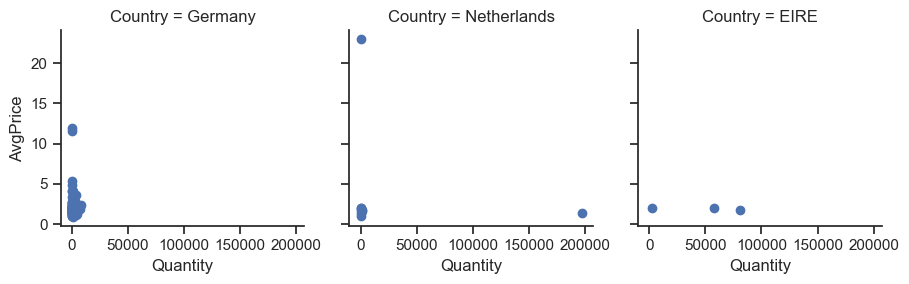

In [28]:
#Plot
# creates the FaceGrid
g = sns.FacetGrid(plottable, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)

# adds legend
g.add_legend();

[]

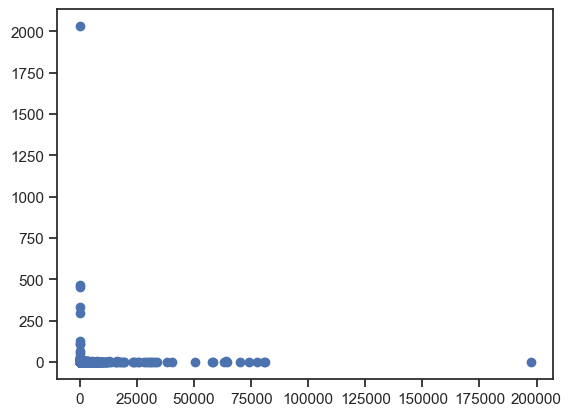

In [30]:
#Plot the data for each CustomerID on a single graph
grouped = online_rt.groupby(['CustomerID'])
plottable = grouped[['Quantity', 'Revenue']].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.plot()

[]

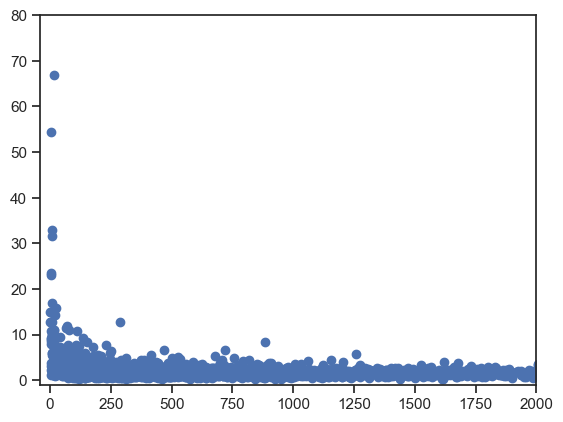

In [31]:
# Zoom in so we can see that curve more clearly
grouped = online_rt.groupby(['CustomerID','Country'])
plottable = grouped.agg({'Quantity': 'sum','Revenue': 'sum'})
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)

#Zooming in. (I'm starting the axes from a negative value so that
#the dots can be plotted in the graph completely.)
plt.xlim(-40,2000)
plt.ylim(-1,80)
plt.plot()

In [ ]:
#Plot a line chart showing revenue (y) per UnitPrice (x).
# Group UnitPrice by intervals of 1 for prices [0,50), and sum Quantity and Revenue

#These are the values for the graph.
#They are used both in selecting data from
#the DataFrame and plotting the data so I've assigned
#them to variables to increase consistency and make things easier
#when playing with the variables.
price_start = 0
price_end = 50
price_interval = 1

#Creating the buckets to collect the data accordingly
buckets = np.arange(price_start,price_end,price_interval)

#Select the data and sum
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()

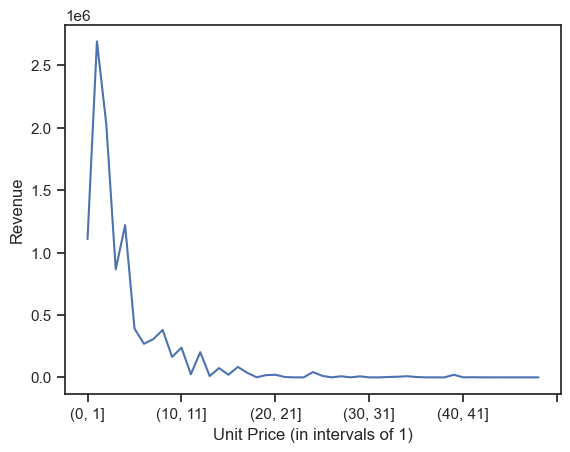

In [33]:
#Plot
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

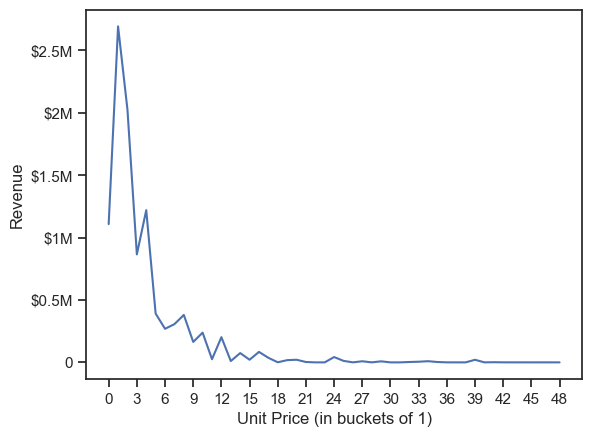

In [36]:
# Make it look nicer.
revenue_per_price.plot()

#Place labels
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')')
plt.ylabel('Revenue')

#Even though the data is bucketed in intervals of 1,
#I'll plot ticks a little bit further apart from each other to avoid cluttering.

plt.xticks(np.arange(price_start,price_end,3),
 np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()
